In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LinearRegression

In [14]:
# Download and prepare the data
df = pd.read_csv("kaggle_london_house_price_data.csv")

In [15]:
# inspect column names 
print (df.columns) 


Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')


In [16]:
# Drop unnecessary columns
df = df.drop(['fullAddress', 'outcode', 'country', 'saleEstimate_ingestedAt','tenure', 'rentEstimate_lowerPrice',
       'rentEstimate_currentPrice', 'rentEstimate_upperPrice',
       'saleEstimate_lowerPrice', 'currentEnergyRating',
       'saleEstimate_upperPrice', 
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'], axis=1) 

In [17]:
print (df.columns) 

Index(['postcode', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'floorAreaSqM', 'livingRooms', 'propertyType',
       'saleEstimate_currentPrice', 'saleEstimate_confidenceLevel'],
      dtype='object')


In [18]:
df.isna().sum()

postcode                            0
latitude                            0
longitude                           0
bathrooms                       51103
bedrooms                        26218
floorAreaSqM                    15812
livingRooms                     39135
propertyType                      675
saleEstimate_currentPrice         549
saleEstimate_confidenceLevel      549
dtype: int64

In [19]:
# Data preprocessing
df = df.dropna(subset=['floorAreaSqM', 'saleEstimate_currentPrice'])  # Drop rows with missing values
X = df[['floorAreaSqM']].values  # Feature: Size in square meters
y = df['saleEstimate_currentPrice'].values  # Target: Current sale price

In [20]:
# Select a linear model
model = LinearRegression()

In [21]:
# Train the model
model.fit(X, y)

LinearRegression()

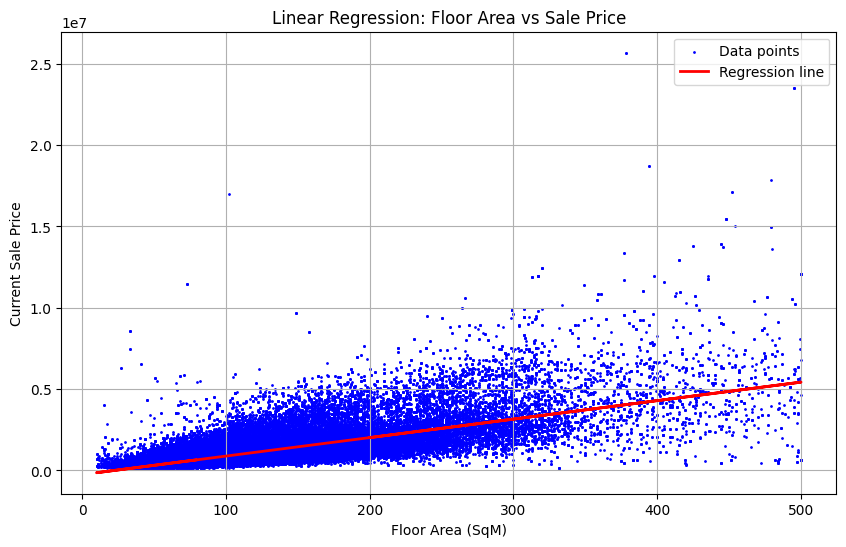

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=1, label="Data points")  # Smaller points
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression line")  # Regression line
plt.xlabel("Floor Area (SqM)")
plt.ylabel("Current Sale Price")
plt.title("Linear Regression: Floor Area vs Sale Price")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Make a prediction for a specific floor area
X_new = [[120]]  # Floor area in square meters 
print(model.predict(X_new))  # Output: predicted price for 120 m²

[1112462.13182313]


In [24]:
# Make a prediction for a specific floor area
X_new = [[82]]  # Floor area in square meters 
print(model.predict(X_new))  # Output: predicted price for 82 m²

[680593.30555656]
